# Exploring Data

Question: Will my United Flight be delayed?

In [437]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
df = pd.read_csv('ua_data.csv')

In [439]:
df =df.drop(columns='Unnamed: 0')

In [440]:
#dropping repeated columns
df = df.drop(columns = 'carrier_name')
df = df.drop(columns = 'airport_name')

In [441]:
df.head()

,year,month,carrier,airport,total_arrival_flights,num_arr_delays,num_aircarrier_delay,num_weather_delay,num_nas_delay,num_security_delay,num_lateaircraft_delay,num_cancelled,num_diverted,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins
0,2003,6,UA,ABQ,150.0,23.0,7.47,3.31,2.76,0.0,9.47,0.0,0.0,1416.0,349.0,266.0,105.0,0.0,696.0
1,2003,6,UA,ALB,90.0,17.0,2.05,0.00,4.90,0.0,10.05,0.0,0.0,652.0,71.0,0.0,130.0,0.0,451.0
2,2003,6,UA,ANC,130.0,23.0,5.75,2.00,11.86,0.0,3.39,0.0,0.0,1049.0,343.0,47.0,426.0,0.0,233.0
3,2003,6,UA,ATL,365.0,74.0,9.73,4.59,38.61,0.0,21.08,0.0,2.0,3935.0,461.0,240.0,1643.0,0.0,1591.0
4,2003,6,UA,AUS,60.0,11.0,3.04,0.96,5.10,0.0,1.90,0.0,0.0,427.0,93.0,56.0,219.0,0.0,59.0


# Catigorizing Data: 
- set target
    - if number of arr delay > = 50 then yes if not then no 
    - percentage of flights delayed instead... 
- We have airport and carrier as categories

In [442]:
df.num_arr_delays.describe()

count    16023.000000
mean       101.453598
std        241.552184
min          0.000000
25%         11.000000
50%         27.000000
75%         79.000000
max       3585.000000
Name: num_arr_delays, dtype: float64

In [443]:
df.total_arrival_flights.describe()

count    16023.000000
mean       502.242339
std       1159.197257
min          1.000000
25%         58.000000
50%        127.000000
75%        385.000000
max      11055.000000
Name: total_arrival_flights, dtype: float64

In [444]:
df['per_delayed'] = df['num_arr_delays']/df['total_arrival_flights']

In [445]:
df['per_delayed'].describe()

count    16023.000000
mean         0.215227
std          0.103411
min          0.000000
25%          0.145161
50%          0.202410
75%          0.272727
max          1.000000
Name: per_delayed, dtype: float64

In [446]:
df['airportdelays>=20percent']= np.where(df['per_delayed']>=.20, '1', '0') 

In [447]:
df['delaymins>=10000']= np.where(df['tot_arr_delay_mins']>=10000, '1', '0') 

In [448]:
df.tail()

,year,month,carrier,airport,total_arrival_flights,num_arr_delays,num_aircarrier_delay,num_weather_delay,num_nas_delay,num_security_delay,...,num_diverted,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,per_delayed,airportdelays>=20percent,delaymins>=10000
16018,2019,8,UA,STT,40.0,3.0,0.88,0.00,2.12,0.0,...,0.0,64.0,23.0,0.0,41.0,0.0,0.0,0.075000,0,0
16019,2019,8,UA,SYR,60.0,15.0,3.08,0.21,2.55,0.0,...,0.0,1172.0,88.0,7.0,91.0,0.0,986.0,0.250000,1,0
16020,2019,8,UA,TPA,636.0,189.0,45.46,8.13,63.16,0.0,...,1.0,12639.0,2691.0,764.0,3335.0,0.0,5849.0,0.297170,1,1
16021,2019,8,UA,TUL,32.0,6.0,3.81,0.00,0.00,0.0,...,0.0,761.0,630.0,0.0,0.0,0.0,131.0,0.187500,0,0
16022,2019,8,UA,TVC,3.0,1.0,0.00,0.00,0.38,0.0,...,0.0,98.0,0.0,0.0,37.0,0.0,61.0,0.333333,1,0


In [449]:
df =df.drop(columns='per_delayed')

In [450]:
df.tail()

,year,month,carrier,airport,total_arrival_flights,num_arr_delays,num_aircarrier_delay,num_weather_delay,num_nas_delay,num_security_delay,...,num_cancelled,num_diverted,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,airportdelays>=20percent,delaymins>=10000
16018,2019,8,UA,STT,40.0,3.0,0.88,0.00,2.12,0.0,...,0.0,0.0,64.0,23.0,0.0,41.0,0.0,0.0,0,0
16019,2019,8,UA,SYR,60.0,15.0,3.08,0.21,2.55,0.0,...,0.0,0.0,1172.0,88.0,7.0,91.0,0.0,986.0,1,0
16020,2019,8,UA,TPA,636.0,189.0,45.46,8.13,63.16,0.0,...,6.0,1.0,12639.0,2691.0,764.0,3335.0,0.0,5849.0,1,1
16021,2019,8,UA,TUL,32.0,6.0,3.81,0.00,0.00,0.0,...,0.0,0.0,761.0,630.0,0.0,0.0,0.0,131.0,0,0
16022,2019,8,UA,TVC,3.0,1.0,0.00,0.00,0.38,0.0,...,0.0,0.0,98.0,0.0,0.0,37.0,0.0,61.0,1,0


# Set Target and Feat DFs

**Target** >= 20% of flights are delayed in one month
1. airportdelays>=20%

**Features**
1. month
2. year 
3. airport (categorize)
4. total_arrival flights
5. on_time_flights - change to percent 
6. air_carrier_delay - change to percent 
7. weather_delay - change to percent 
8. nas_delay - change to percent 
9. sec_delay - change to percent
10. aircraft_latearr - change to percent
11. cancelled - change to percent
12. diverted - change to percent 

In [451]:
df['%on_time'] = ((df['total_arrival_flights']-df['num_arr_delays'])/df['total_arrival_flights'])*100
df['%delay_aircarrier'] = (df['num_aircarrier_delay']/df['total_arrival_flights'])*100
df['%delay_weather'] = (df['num_weather_delay']/df['total_arrival_flights'])*100
df['%delay_nas'] = (df['num_nas_delay']/df['total_arrival_flights'])*100
df['%delay_sec'] = (df['num_security_delay']/df['total_arrival_flights'])*100
df['%delay_lateaircraft'] = (df['num_lateaircraft_delay']/df['total_arrival_flights'])*100
df['%cancelled'] = (df['num_cancelled']/df['total_arrival_flights'])*100
df['%diverted'] = (df['num_diverted']/df['total_arrival_flights'])*100

In [452]:
df = df.drop(columns = 'num_aircarrier_delay')
df = df.drop(columns = 'num_weather_delay')
df = df.drop(columns = 'num_nas_delay')
df = df.drop(columns = 'num_security_delay')
df = df.drop(columns = 'num_lateaircraft_delay')
df = df.drop(columns = 'num_cancelled')
df = df.drop(columns = 'num_diverted')
df.head()

,year,month,carrier,airport,total_arrival_flights,num_arr_delays,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,...,airportdelays>=20percent,delaymins>=10000,%on_time,%delay_aircarrier,%delay_weather,%delay_nas,%delay_sec,%delay_lateaircraft,%cancelled,%diverted
0,2003,6,UA,ABQ,150.0,23.0,1416.0,349.0,266.0,105.0,...,0,0,84.666667,4.980000,2.206667,1.840000,0.0,6.313333,0.0,0.000000
1,2003,6,UA,ALB,90.0,17.0,652.0,71.0,0.0,130.0,...,0,0,81.111111,2.277778,0.000000,5.444444,0.0,11.166667,0.0,0.000000
2,2003,6,UA,ANC,130.0,23.0,1049.0,343.0,47.0,426.0,...,0,0,82.307692,4.423077,1.538462,9.123077,0.0,2.607692,0.0,0.000000
3,2003,6,UA,ATL,365.0,74.0,3935.0,461.0,240.0,1643.0,...,1,0,79.726027,2.665753,1.257534,10.578082,0.0,5.775342,0.0,0.547945
4,2003,6,UA,AUS,60.0,11.0,427.0,93.0,56.0,219.0,...,0,0,81.666667,5.066667,1.600000,8.500000,0.0,3.166667,0.0,0.000000


# continue to clean data

Question: Will my United flight be delayed? 

Target: **airportdelays>=20%**  

Features: 
    - airport
    - total arrival flights 
    - total arrival delay minutes 
        - carrier delay minutes 
        - weather delay minutes
        - nas delay minutes 
        - sec delay minutes 
        - late aircraft minutes 
    - % on time 
    - % air carrier delay 
    - % weather delay 
    - % nas delay 
    - % security delays 
    - % late aircrafts 
    - % cancelled 
    - % diverted 

In [453]:
df = df.drop(columns='num_arr_delays')

In [454]:
df = df.drop(columns = 'carrier')

In [538]:
df.head()

,year,month,total_arrival_flights,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,airportdelays>=20%,...,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS,delaymins>=10000
0,2003,6,150.0,1416.0,349.0,266.0,105.0,0.0,696.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2003,6,90.0,652.0,71.0,0.0,130.0,0.0,451.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2003,6,130.0,1049.0,343.0,47.0,426.0,0.0,233.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2003,6,365.0,3935.0,461.0,240.0,1643.0,0.0,1591.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2003,6,60.0,427.0,93.0,56.0,219.0,0.0,59.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [541]:
df['airportdelays>=20%'] = df['airportdelays>=20%'].astype(float)
df['delaymins>=10000'] = df['delaymins>=10000'].astype(float)

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16023 entries, 0 to 16022
Columns: 147 entries, year to delaymins>=10000
dtypes: float64(17), int64(130)
memory usage: 18.0 MB


In [543]:
df.head()

,year,month,total_arrival_flights,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,airportdelays>=20%,...,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS,delaymins>=10000
0,2003,6,150.0,1416.0,349.0,266.0,105.0,0.0,696.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1,2003,6,90.0,652.0,71.0,0.0,130.0,0.0,451.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
2,2003,6,130.0,1049.0,343.0,47.0,426.0,0.0,233.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
3,2003,6,365.0,3935.0,461.0,240.0,1643.0,0.0,1591.0,1.0,...,0,0,0,0,0,0,0,0,0,0.0
4,2003,6,60.0,427.0,93.0,56.0,219.0,0.0,59.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


# Dealing with Categorical Vairables
- airport 
- 129 unique values 


In [459]:
print(df['airport'].nunique())

129


In [460]:
df.columns

Index(['year', 'month', 'airport', 'total_arrival_flights',
       'tot_arr_delay_mins', 'carrier_delay_mins', 'weather_delay_mins',
       'nas_delay_mins', 'security_delay_mins', 'lateaircraft_delay_mins',
       'airportdelays>=20percent', 'delaymins>=10000', '%on_time',
       '%delay_aircarrier', '%delay_weather', '%delay_nas', '%delay_sec',
       '%delay_lateaircraft', '%cancelled', '%diverted'],
      dtype='object')

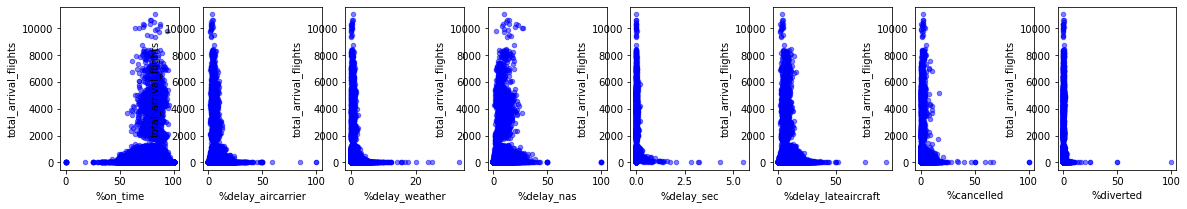

In [461]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(20,3))
 
for xcol, ax in zip(['%on_time', '%delay_aircarrier', '%delay_weather', '%delay_nas', '%delay_sec', '%delay_lateaircraft', '%cancelled', '%diverted'], axes):
    df.plot(kind='scatter', x=xcol, y='total_arrival_flights', ax=ax, alpha=0.5, color='b')

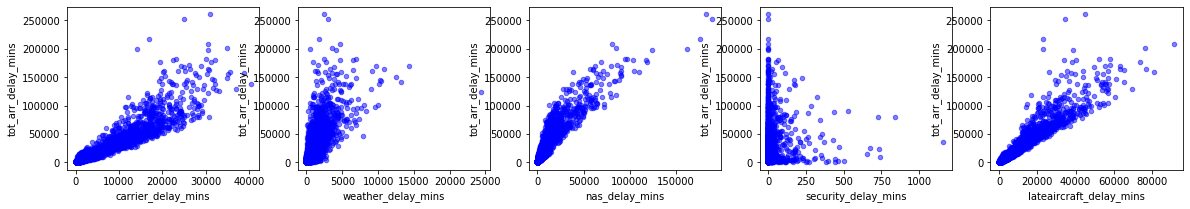

In [462]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,3))
 
for xcol, ax in zip(['carrier_delay_mins', 'weather_delay_mins','nas_delay_mins', 'security_delay_mins', 'lateaircraft_delay_mins'], axes):
    df.plot(kind='scatter', x=xcol, y='tot_arr_delay_mins', ax=ax, alpha=0.5, color='b')

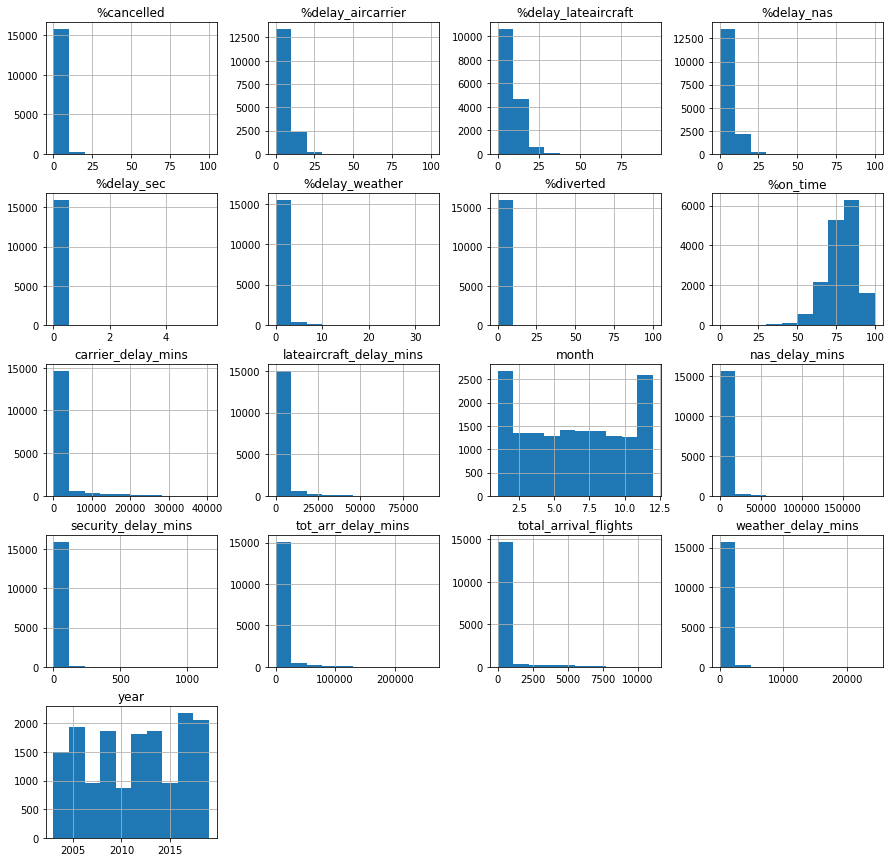

In [463]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

In [464]:
cat_origin = df.airport.astype('category')
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

origin_encoded = lb_make.fit_transform(cat_origin)

In [465]:
origin_encoded

array([  0,   2,   3, ..., 124, 125, 127])

In [466]:
pd.get_dummies(cat_origin)

,ABQ,AGS,ALB,ANC,ATL,AUS,AVL,BDL,BGR,BHM,...,SPN,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [467]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
origin_dummies = lb.fit_transform(cat_origin)
# You need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)
origin_dum_df

,ABQ,AGS,ALB,ANC,ATL,AUS,AVL,BDL,BGR,BHM,...,SPN,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [468]:
#To Avoid the Dummy Variable Trap = dropping ABQ
airport_dummies = pd.get_dummies(cat_origin, drop_first=True)

In [469]:
df.head()

,year,month,airport,total_arrival_flights,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,airportdelays>=20percent,delaymins>=10000,%on_time,%delay_aircarrier,%delay_weather,%delay_nas,%delay_sec,%delay_lateaircraft,%cancelled,%diverted
0,2003,6,ABQ,150.0,1416.0,349.0,266.0,105.0,0.0,696.0,0,0,84.666667,4.980000,2.206667,1.840000,0.0,6.313333,0.0,0.000000
1,2003,6,ALB,90.0,652.0,71.0,0.0,130.0,0.0,451.0,0,0,81.111111,2.277778,0.000000,5.444444,0.0,11.166667,0.0,0.000000
2,2003,6,ANC,130.0,1049.0,343.0,47.0,426.0,0.0,233.0,0,0,82.307692,4.423077,1.538462,9.123077,0.0,2.607692,0.0,0.000000
3,2003,6,ATL,365.0,3935.0,461.0,240.0,1643.0,0.0,1591.0,1,0,79.726027,2.665753,1.257534,10.578082,0.0,5.775342,0.0,0.547945
4,2003,6,AUS,60.0,427.0,93.0,56.0,219.0,0.0,59.0,0,0,81.666667,5.066667,1.600000,8.500000,0.0,3.166667,0.0,0.000000


In [470]:
# df = df.drop(columns = 'airport')
df = pd.concat([df,airport_dummies], axis = 1)
df.head()

,year,month,airport,total_arrival_flights,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,...,SPN,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS
0,2003,6,ABQ,150.0,1416.0,349.0,266.0,105.0,0.0,696.0,...,0,0,0,0,0,0,0,0,0,0
1,2003,6,ALB,90.0,652.0,71.0,0.0,130.0,0.0,451.0,...,0,0,0,0,0,0,0,0,0,0
2,2003,6,ANC,130.0,1049.0,343.0,47.0,426.0,0.0,233.0,...,0,0,0,0,0,0,0,0,0,0
3,2003,6,ATL,365.0,3935.0,461.0,240.0,1643.0,0.0,1591.0,...,0,0,0,0,0,0,0,0,0,0
4,2003,6,AUS,60.0,427.0,93.0,56.0,219.0,0.0,59.0,...,0,0,0,0,0,0,0,0,0,0


In [471]:
cat_origin= df.airport.astype('category')
cat_origin

0        ABQ
1        ALB
2        ANC
3        ATL
4        AUS
5        BDL
6        BIL
7        BOI
8        BOS
9        BTV
10       BUF
11       BUR
12       BWI
13       CLE
14       CLT
15       CMH
16       COS
17       CVG
18       DAY
19       DCA
20       DEN
21       DFW
22       DSM
23       DTW
24       EWR
25       FLL
26       GEG
27       GRR
28       GSO
29       HNL
        ... 
15993    PIT
15994    PNS
15995    PSP
15996    PWM
15997    RAP
15998    RDM
15999    RDU
16000    RIC
16001    RNO
16002    ROC
16003    RSW
16004    SAN
16005    SAT
16006    SAV
16007    SBA
16008    SEA
16009    SFO
16010    SJC
16011    SJU
16012    SLC
16013    SMF
16014    SNA
16015    SPN
16016    SRQ
16017    STL
16018    STT
16019    SYR
16020    TPA
16021    TUL
16022    TVC
Name: airport, Length: 16023, dtype: category
Categories (129, object): [ABQ, AGS, ALB, ANC, ..., TUL, TUS, TVC, TYS]

# Setting target and Predictions
# Checking for Multicolliniarity

In [473]:
df_pred = df.drop(columns= "airportdelays>=20percent")
df_target = pd.DataFrame(df["airportdelays>=20percent"])

In [474]:
df_pred.head()

,year,month,airport,total_arrival_flights,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,...,SPN,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS
0,2003,6,ABQ,150.0,1416.0,349.0,266.0,105.0,0.0,696.0,...,0,0,0,0,0,0,0,0,0,0
1,2003,6,ALB,90.0,652.0,71.0,0.0,130.0,0.0,451.0,...,0,0,0,0,0,0,0,0,0,0
2,2003,6,ANC,130.0,1049.0,343.0,47.0,426.0,0.0,233.0,...,0,0,0,0,0,0,0,0,0,0
3,2003,6,ATL,365.0,3935.0,461.0,240.0,1643.0,0.0,1591.0,...,0,0,0,0,0,0,0,0,0,0
4,2003,6,AUS,60.0,427.0,93.0,56.0,219.0,0.0,59.0,...,0,0,0,0,0,0,0,0,0,0


In [475]:
df_target.head()

,airportdelays>=20percent
0,0
1,0
2,0
3,1
4,0


In [476]:
df_pred.corr()

,year,month,total_arrival_flights,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,%on_time,...,SPN,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS
year,1.000000,-0.077486,-0.000681,0.013200,0.033130,0.126042,-0.007618,-0.025584,0.010321,0.137884,...,0.043034,0.057096,-0.010504,-0.008789,0.040363,-0.007017,-0.016572,-0.029163,0.032392,0.047049
month,-0.077486,1.000000,0.010818,-0.002148,0.001736,-0.023410,-0.002565,0.019635,-0.001260,0.063695,...,0.006610,-0.007596,0.005066,-0.005695,-0.002675,0.001600,0.006090,-0.002992,0.009225,0.000451
total_arrival_flights,-0.000681,0.010818,1.000000,0.904359,0.926667,0.688327,0.769477,0.228766,0.889408,0.055416,...,-0.014441,-0.026022,-0.040032,-0.043308,-0.013312,-0.007538,-0.040500,-0.034098,-0.009616,-0.015266
tot_arr_delay_mins,0.013200,-0.002148,0.904359,1.000000,0.939800,0.773216,0.918532,0.181938,0.953463,-0.063444,...,-0.013433,-0.023856,-0.035733,-0.039474,-0.011576,-0.007369,-0.036878,-0.031282,-0.008604,-0.013911
carrier_delay_mins,0.033130,0.001736,0.926667,0.939800,1.000000,0.768248,0.751879,0.216225,0.952952,-0.035186,...,-0.014748,-0.026404,-0.040074,-0.043604,-0.013475,-0.002281,-0.041481,-0.035426,-0.009789,-0.015728
weather_delay_mins,0.126042,-0.023410,0.688327,0.773216,0.768248,1.000000,0.615001,0.125010,0.780318,-0.048679,...,-0.010773,-0.021088,-0.032819,-0.034973,-0.010875,0.011135,-0.031653,-0.027808,-0.007779,-0.012779
nas_delay_mins,-0.007618,-0.002565,0.769477,0.918532,0.751879,0.615001,1.000000,0.130941,0.767222,-0.066316,...,-0.009287,-0.016490,-0.026388,-0.026953,-0.008368,-0.012725,-0.026410,-0.021894,-0.005852,-0.009538
security_delay_mins,-0.025584,0.019635,0.228766,0.181938,0.216225,0.125010,0.130941,1.000000,0.186585,0.020117,...,-0.003518,-0.006496,-0.010725,-0.008474,-0.003243,0.001422,-0.009181,-0.008752,-0.002224,-0.003690
lateaircraft_delay_mins,0.010321,-0.001260,0.889408,0.953463,0.952952,0.780318,0.767222,0.186585,1.000000,-0.066211,...,-0.015128,-0.026509,-0.037187,-0.044322,-0.011930,-0.004666,-0.039563,-0.033912,-0.009490,-0.015289
%on_time,0.137884,0.063695,0.055416,-0.063444,-0.035186,-0.048679,-0.066316,0.020117,-0.066211,1.000000,...,0.040880,0.015830,-0.022673,0.040820,0.009663,0.007170,0.013733,0.026255,-0.034533,0.017306


In [477]:
abs(df_pred.corr())>0.75

,year,month,total_arrival_flights,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,%on_time,...,SPN,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS
year,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
month,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_arrival_flights,False,False,True,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
tot_arr_delay_mins,False,False,True,True,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
carrier_delay_mins,False,False,True,True,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
weather_delay_mins,False,False,False,True,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
nas_delay_mins,False,False,True,True,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
security_delay_mins,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
lateaircraft_delay_mins,False,False,True,True,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
%on_time,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


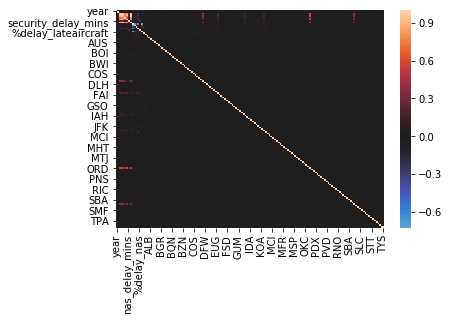

In [478]:
sns.heatmap(df_pred.corr(), center=0)

In [479]:
df.columns

Index(['year', 'month', 'airport', 'total_arrival_flights',
       'tot_arr_delay_mins', 'carrier_delay_mins', 'weather_delay_mins',
       'nas_delay_mins', 'security_delay_mins', 'lateaircraft_delay_mins',
       ...
       'SPN', 'SRQ', 'STL', 'STT', 'SYR', 'TPA', 'TUL', 'TUS', 'TVC', 'TYS'],
      dtype='object', length=148)

In [480]:
data = pd.concat([df_target, df_pred], axis=1)

In [481]:
data = data.drop(columns = 'airport')

In [482]:
# all data saved to csv -- cleaned 
 
data.to_csv("uadata_cleaned.csv")

In [483]:
data.shape

(16023, 147)

In [484]:
data.head()

,airportdelays>=20percent,year,month,total_arrival_flights,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,...,SPN,SRQ,STL,STT,SYR,TPA,TUL,TUS,TVC,TYS
0,0,2003,6,150.0,1416.0,349.0,266.0,105.0,0.0,696.0,...,0,0,0,0,0,0,0,0,0,0
1,0,2003,6,90.0,652.0,71.0,0.0,130.0,0.0,451.0,...,0,0,0,0,0,0,0,0,0,0
2,0,2003,6,130.0,1049.0,343.0,47.0,426.0,0.0,233.0,...,0,0,0,0,0,0,0,0,0,0
3,1,2003,6,365.0,3935.0,461.0,240.0,1643.0,0.0,1591.0,...,0,0,0,0,0,0,0,0,0,0
4,0,2003,6,60.0,427.0,93.0,56.0,219.0,0.0,59.0,...,0,0,0,0,0,0,0,0,0,0


In [485]:
print(list(data.columns))

['airportdelays>=20percent', 'year', 'month', 'total_arrival_flights', 'tot_arr_delay_mins', 'carrier_delay_mins', 'weather_delay_mins', 'nas_delay_mins', 'security_delay_mins', 'lateaircraft_delay_mins', 'delaymins>=10000', '%on_time', '%delay_aircarrier', '%delay_weather', '%delay_nas', '%delay_sec', '%delay_lateaircraft', '%cancelled', '%diverted', 'AGS', 'ALB', 'ANC', 'ATL', 'AUS', 'AVL', 'BDL', 'BGR', 'BHM', 'BIL', 'BNA', 'BOI', 'BOS', 'BQN', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CHS', 'CID', 'CLE', 'CLT', 'CMH', 'COS', 'CRP', 'CVG', 'DAY', 'DCA', 'DEN', 'DFW', 'DLH', 'DSM', 'DTW', 'EGE', 'ELP', 'EUG', 'EWR', 'FAI', 'FAT', 'FCA', 'FLL', 'FSD', 'GEG', 'GRR', 'GSO', 'GSP', 'GUC', 'GUM', 'HDN', 'HNL', 'IAD', 'IAH', 'ICT', 'IDA', 'IND', 'ITO', 'JAC', 'JAX', 'JFK', 'KOA', 'LAS', 'LAX', 'LGA', 'LIH', 'MAF', 'MCI', 'MCO', 'MDT', 'MDW', 'MEM', 'MFE', 'MFR', 'MHT', 'MIA', 'MKE', 'MSN', 'MSO', 'MSP', 'MSY', 'MTJ', 'MYR', 'OAK', 'OGG', 'OKC', 'OMA', 'ONT', 'ORD', 'ORF', 'PBI', 'PDX', 'P

# DataFrame: minutes 

In [486]:
df_min = pd.DataFrame(data.iloc[:,0:10])

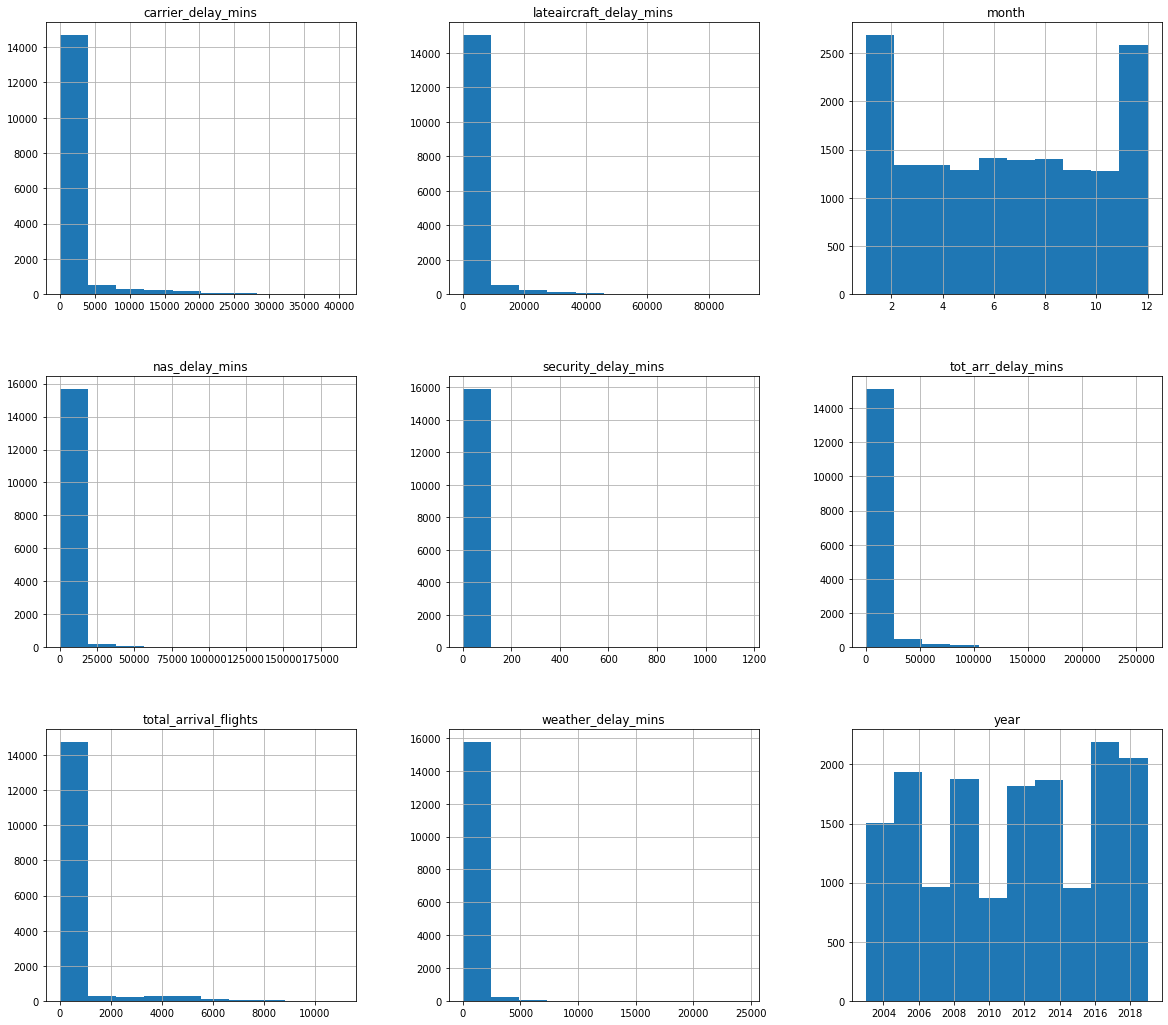

In [487]:
df_min.hist(figsize = (20, 18))
plt.show()

In [488]:
df_min.columns

Index(['airportdelays>=20percent', 'year', 'month', 'total_arrival_flights',
       'tot_arr_delay_mins', 'carrier_delay_mins', 'weather_delay_mins',
       'nas_delay_mins', 'security_delay_mins', 'lateaircraft_delay_mins'],
      dtype='object')

In [489]:
feats = ['year','month', 'carrier_delay_mins', 'weather_delay_mins', 'nas_delay_mins', 'security_delay_mins', 'lateaircraft_delay_mins']
corr = df_min[feats].corr()
corr

,year,month,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins
year,1.000000,-0.077486,0.033130,0.126042,-0.007618,-0.025584,0.010321
month,-0.077486,1.000000,0.001736,-0.023410,-0.002565,0.019635,-0.001260
carrier_delay_mins,0.033130,0.001736,1.000000,0.768248,0.751879,0.216225,0.952952
weather_delay_mins,0.126042,-0.023410,0.768248,1.000000,0.615001,0.125010,0.780318
nas_delay_mins,-0.007618,-0.002565,0.751879,0.615001,1.000000,0.130941,0.767222
security_delay_mins,-0.025584,0.019635,0.216225,0.125010,0.130941,1.000000,0.186585
lateaircraft_delay_mins,0.010321,-0.001260,0.952952,0.780318,0.767222,0.186585,1.000000


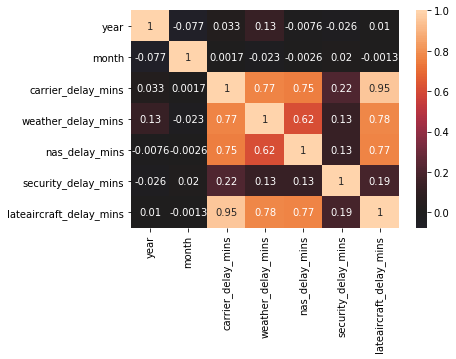

In [490]:
sns.heatmap(corr, center=0, annot=True);

In [491]:
descr = df_min[feats].describe()
descr

,year,month,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins
count,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000
mean,2011.347563,6.458216,1638.676777,239.962429,1904.750296,2.576047,2559.122199
std,4.848996,3.432733,3702.515469,682.297520,7173.905878,25.889305,5923.270481
min,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3.000000,166.000000,0.000000,75.000000,0.000000,260.000000
50%,2012.000000,6.000000,473.000000,42.000000,251.000000,0.000000,789.000000
75%,2016.000000,9.000000,1290.500000,191.000000,923.000000,0.000000,2127.000000
max,2019.000000,12.000000,40363.000000,24442.000000,188994.000000,1161.000000,91633.000000


In [492]:
print('%On time flights')
print(df['%on_time'].describe())
print("\n")

print('%late aircraft flights')
print(df['%delay_lateaircraft'].describe())
print("\n")

print('%aircarrier delayed flights')
print(df['%delay_aircarrier'].describe())
print("\n")

print('% nas delayed flights')
print(df['%delay_nas'].describe())
print("\n")

print('% sec delayed flights')
print(df['%delay_sec'].describe())
print("\n")

print('% weather delayed flights')
print(df['%delay_weather'].describe())

%On time flights
count    16023.000000
mean        78.477297
std         10.341115
min          0.000000
25%         72.727273
50%         79.759036
75%         85.483871
max        100.000000
Name: %on_time, dtype: float64


%late aircraft flights
count    16023.000000
mean         8.162312
std          5.424801
min          0.000000
25%          4.480020
50%          7.147727
75%         10.847574
max         94.000000
Name: %delay_lateaircraft, dtype: float64


%aircarrier delayed flights
count    16023.000000
mean         6.649649
std          4.560146
min          0.000000
25%          3.914271
50%          5.835238
75%          8.397351
max        100.000000
Name: %delay_aircarrier, dtype: float64


% nas delayed flights
count    16023.000000
mean         5.983824
std          5.048687
min          0.000000
25%          2.790510
50%          4.961538
75%          7.861645
max        100.000000
Name: %delay_nas, dtype: float64


% sec delayed flights
count    16023.000000
mean    

# EDA Summary 

On average there are 105.75 hours delay per month for united with 502 flights
 - average carrier delay is 1,639 minutes (27 hrs)
 - average weather delay is 240 minutes (4hrs)
 - average nas delay is 1905 minutes (~32 hrs)
 - average security delay is 3 minutes 
 - average late aircraft delay is 2559 minutes (~43 hrs) 

most delays with united are due to late aircrafts arrivals

On Average 78% of United Airlines flights are **ON TIME** and 22% are delayed

average percents of delayed data: 
- % of late aircrafts 8.162312%
- % of delayed air carrier 6.649649%
- % of delayed nas 5.983824%
- % of delayed sec 0.006477%
- % of delayed weater 0.720667%


In [529]:
df= pd.read_csv(f"ua_cleaned.csv")
df = df.drop(columns="Unnamed: 0")
df['delaymins>=10000']= np.where(df['tot_arr_delay_mins']>=10000, '1', '0') 

In [530]:
list(df.columns)

['year',
 'month',
 'total_arrival_flights',
 'tot_arr_delay_mins',
 'carrier_delay_mins',
 'weather_delay_mins',
 'nas_delay_mins',
 'security_delay_mins',
 'lateaircraft_delay_mins',
 'airportdelays>=20%',
 'percent_on_time',
 'percent_delay_aircarrier',
 'percent_delay_weather',
 'percent_delay_nas',
 'percent_delay_sec',
 'percent_delay_lateaircraft',
 'percent_cancelled',
 'Percent_diverted',
 'AGS',
 'ALB',
 'ANC',
 'ATL',
 'AUS',
 'AVL',
 'BDL',
 'BGR',
 'BHM',
 'BIL',
 'BNA',
 'BOI',
 'BOS',
 'BQN',
 'BTR',
 'BTV',
 'BUF',
 'BUR',
 'BWI',
 'BZN',
 'CHS',
 'CID',
 'CLE',
 'CLT',
 'CMH',
 'COS',
 'CRP',
 'CVG',
 'DAY',
 'DCA',
 'DEN',
 'DFW',
 'DLH',
 'DSM',
 'DTW',
 'EGE',
 'ELP',
 'EUG',
 'EWR',
 'FAI',
 'FAT',
 'FCA',
 'FLL',
 'FSD',
 'GEG',
 'GRR',
 'GSO',
 'GSP',
 'GUC',
 'GUM',
 'HDN',
 'HNL',
 'IAD',
 'IAH',
 'ICT',
 'IDA',
 'IND',
 'ITO',
 'JAC',
 'JAX',
 'JFK',
 'KOA',
 'LAS',
 'LAX',
 'LGA',
 'LIH',
 'MAF',
 'MCI',
 'MCO',
 'MDT',
 'MDW',
 'MEM',
 'MFE',
 'MFR',
 'MHT',

In [531]:

print("Total arrival flights --- NYC area---- ")
print(df.groupby(['EWR']).max().total_arrival_flights)
print(df.groupby(['JFK']).max().total_arrival_flights)
print(df.groupby(['LGA']).max().total_arrival_flights)

print("--------------------------------------------------")


print('\n')
print("average minute delay per airport --- NYC area---- ")
print(df.groupby(['EWR']).mean().tot_arr_delay_mins)
print(df.groupby(['JFK']).mean().tot_arr_delay_mins)
print(df.groupby(['LGA']).mean().tot_arr_delay_mins)

print("--------------------------------------------------")
print('\n')
print("-------NYC airport percentages of ontime flights-------")
print(df.groupby(['EWR']).mean().percent_on_time)
print(df.groupby(['JFK']).mean().percent_on_time)
print(df.groupby(['LGA']).mean().percent_on_time)

Total arrival flights --- NYC area---- 
EWR
0    11055.0
1     5331.0
Name: total_arrival_flights, dtype: float64
JFK
0    11055.0
1      474.0
Name: total_arrival_flights, dtype: float64
LGA
0    11055.0
1      858.0
Name: total_arrival_flights, dtype: float64
--------------------------------------------------


average minute delay per airport --- NYC area---- 
EWR
0     5957.844327
1    37777.338462
Name: tot_arr_delay_mins, dtype: float64
JFK
0    6361.524631
1    4593.953020
Name: tot_arr_delay_mins, dtype: float64
LGA
0     6275.565959
1    11988.117949
Name: tot_arr_delay_mins, dtype: float64
--------------------------------------------------


-------NYC airport percentages of ontime flights-------
EWR
0    78.542558
1    73.180178
Name: percent_on_time, dtype: float64
JFK
0    78.458442
1    80.486080
Name: percent_on_time, dtype: float64
LGA
0    78.547438
1    72.784029
Name: percent_on_time, dtype: float64


In [533]:
print('\n')
print("average minute delays EWR---- ")
print('\n')
print(df.groupby(['EWR']).mean().lateaircraft_delay_mins)
print('\n')
print(df.groupby(['EWR']).mean().carrier_delay_mins)
print('\n')
print(df.groupby(['EWR']).mean().weather_delay_mins)
print('\n')
print(df.groupby(['EWR']).mean().nas_delay_mins)
print('\n')
print(df.groupby(['EWR']).mean().security_delay_mins)



average minute delays EWR---- 


EWR
0     2444.804903
1    11838.169231
Name: lateaircraft_delay_mins, dtype: float64


EWR
0    1569.455901
1    7257.282051
Name: carrier_delay_mins, dtype: float64


EWR
0     228.373642
1    1180.615385
Name: weather_delay_mins, dtype: float64


EWR
0     1712.741976
1    17489.917949
Name: nas_delay_mins, dtype: float64


EWR
0     2.467905
1    11.353846
Name: security_delay_mins, dtype: float64


In [535]:
list(df.columns)

['year',
 'month',
 'total_arrival_flights',
 'tot_arr_delay_mins',
 'carrier_delay_mins',
 'weather_delay_mins',
 'nas_delay_mins',
 'security_delay_mins',
 'lateaircraft_delay_mins',
 'airportdelays>=20%',
 'percent_on_time',
 'percent_delay_aircarrier',
 'percent_delay_weather',
 'percent_delay_nas',
 'percent_delay_sec',
 'percent_delay_lateaircraft',
 'percent_cancelled',
 'Percent_diverted',
 'AGS',
 'ALB',
 'ANC',
 'ATL',
 'AUS',
 'AVL',
 'BDL',
 'BGR',
 'BHM',
 'BIL',
 'BNA',
 'BOI',
 'BOS',
 'BQN',
 'BTR',
 'BTV',
 'BUF',
 'BUR',
 'BWI',
 'BZN',
 'CHS',
 'CID',
 'CLE',
 'CLT',
 'CMH',
 'COS',
 'CRP',
 'CVG',
 'DAY',
 'DCA',
 'DEN',
 'DFW',
 'DLH',
 'DSM',
 'DTW',
 'EGE',
 'ELP',
 'EUG',
 'EWR',
 'FAI',
 'FAT',
 'FCA',
 'FLL',
 'FSD',
 'GEG',
 'GRR',
 'GSO',
 'GSP',
 'GUC',
 'GUM',
 'HDN',
 'HNL',
 'IAD',
 'IAH',
 'ICT',
 'IDA',
 'IND',
 'ITO',
 'JAC',
 'JAX',
 'JFK',
 'KOA',
 'LAS',
 'LAX',
 'LGA',
 'LIH',
 'MAF',
 'MCI',
 'MCO',
 'MDT',
 'MDW',
 'MEM',
 'MFE',
 'MFR',
 'MHT',

# Question 2: 

will my Newark Airport United Airlines flight be delayed? 
- classify united 
- classify ewr

In [517]:
ewr_ua = pd.read_csv('united_ewr.csv')

In [518]:
ewr_ua = ewr_ua.drop(columns='Unnamed: 0')

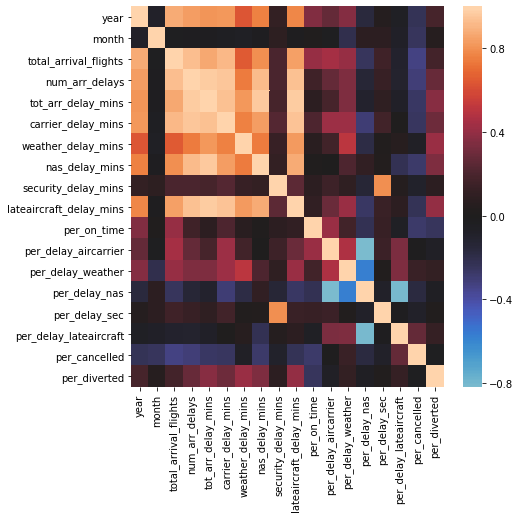

In [519]:
plt.subplots(figsize=(7, 7))
sns.heatmap(ewr_ua.corr(), center=0) 

In [520]:
pd.DataFrame(ewr_ua.describe())

,year,month,total_arrival_flights,num_arr_delays,tot_arr_delay_mins,carrier_delay_mins,weather_delay_mins,nas_delay_mins,security_delay_mins,lateaircraft_delay_mins,per_on_time,per_delay_aircarrier,per_delay_weather,per_delay_nas,per_delay_sec,per_delay_lateaircraft,per_cancelled,per_diverted
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2011.041026,6.507692,2206.025641,526.220513,37777.338462,7257.282051,1180.615385,17489.917949,11.353846,11838.169231,73.180178,17.519466,1.786475,54.421797,0.023854,26.248243,2.476106,0.312495
std,4.718723,3.436267,1927.134643,477.665077,38751.119535,7478.399669,1828.962866,18823.703592,51.250275,12461.975639,8.363167,6.646921,1.233931,11.618441,0.100648,6.755555,2.307036,0.357829
min,2003.000000,1.000000,168.000000,37.000000,1937.000000,124.000000,0.000000,959.000000,0.000000,223.000000,48.926014,3.015625,0.000000,27.579681,0.000000,8.092308,0.108225,0.000000
25%,2007.000000,4.000000,415.000000,131.000000,8669.500000,1087.500000,86.500000,4283.500000,0.000000,2384.000000,67.392256,12.931015,0.878082,46.649955,0.000000,21.453758,0.801539,0.000000
50%,2011.000000,7.000000,633.000000,193.000000,14170.000000,2090.000000,402.000000,8202.000000,0.000000,4672.000000,73.966840,16.513514,1.632562,54.800160,0.000000,25.913481,1.503759,0.209644
75%,2015.000000,9.000000,4058.000000,918.500000,60320.500000,12619.500000,1441.000000,25983.000000,0.000000,18424.000000,79.473482,21.573928,2.605846,62.443898,0.000000,30.691455,3.390854,0.441072
max,2019.000000,12.000000,5331.000000,1823.000000,182069.000000,28524.000000,12515.000000,94239.000000,436.000000,57835.000000,89.301832,38.410359,5.469051,83.105769,0.769231,42.392638,10.714286,1.873536


In [521]:
pd.DataFrame(ewr_ua.mean())

,0
year,2011.041026
month,6.507692
total_arrival_flights,2206.025641
num_arr_delays,526.220513
tot_arr_delay_mins,37777.338462
carrier_delay_mins,7257.282051
weather_delay_mins,1180.615385
nas_delay_mins,17489.917949
security_delay_mins,11.353846
lateaircraft_delay_mins,11838.169231


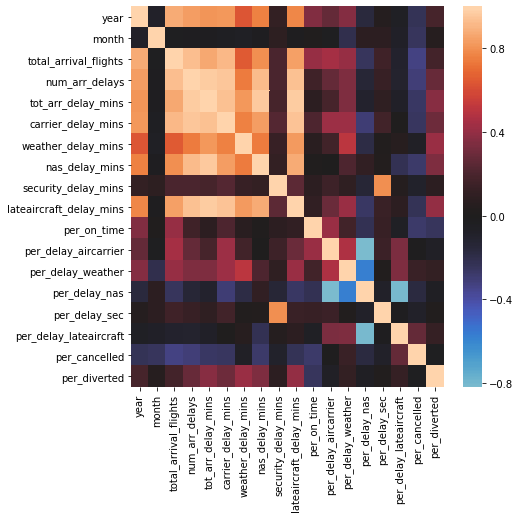

In [522]:
plt.subplots(figsize=(7, 7))
sns.heatmap(ewr_ua.corr(), center=0) 

In [523]:
((ewr_ua['total_arrival_flights']-ewr_ua['num_arr_delays'])/ewr_ua['total_arrival_flights']).mean()

0.7318017796302769

In [524]:
100-(ewr_ua['per_on_time'].mean())

26.819822036972383

In [525]:
ewr_ua['total_arrival_flights'].mean()

2206.025641025641

In [526]:
ewr_ua['num_arr_delays'].mean()

526.2205128205128

In [527]:
# There is an average of 2,206 United Airline flights per month arriving in Newark Airport. 
# On average there are ~526 flights that have arrival delays > 15 minutes
# Minute analysis
# - total average min delay = 37,777 mins per month (~20 hour delays per day on average) 

In [528]:
ewr_ua.to_csv('united_ewr.csv')